(100, 20)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


<function matplotlib.pyplot.show>

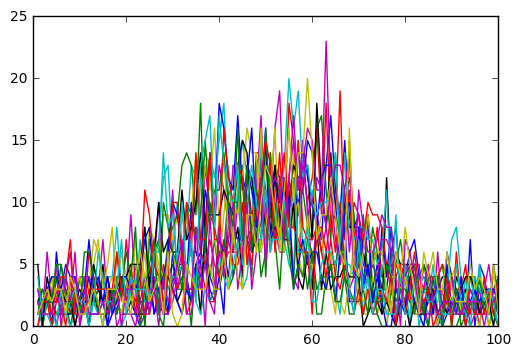

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#1.1 a)
usecol= np.arange(1,21)
data = np.loadtxt('expDat.txt', skiprows=1, delimiter=',',usecols=usecol)
print(data.shape)
#1.1 b)
time = np.arange(1,101)
print(time)
for i in range(len(data[0])):
    plt.plot(time, data[:,i], label="line " )
plt.show    




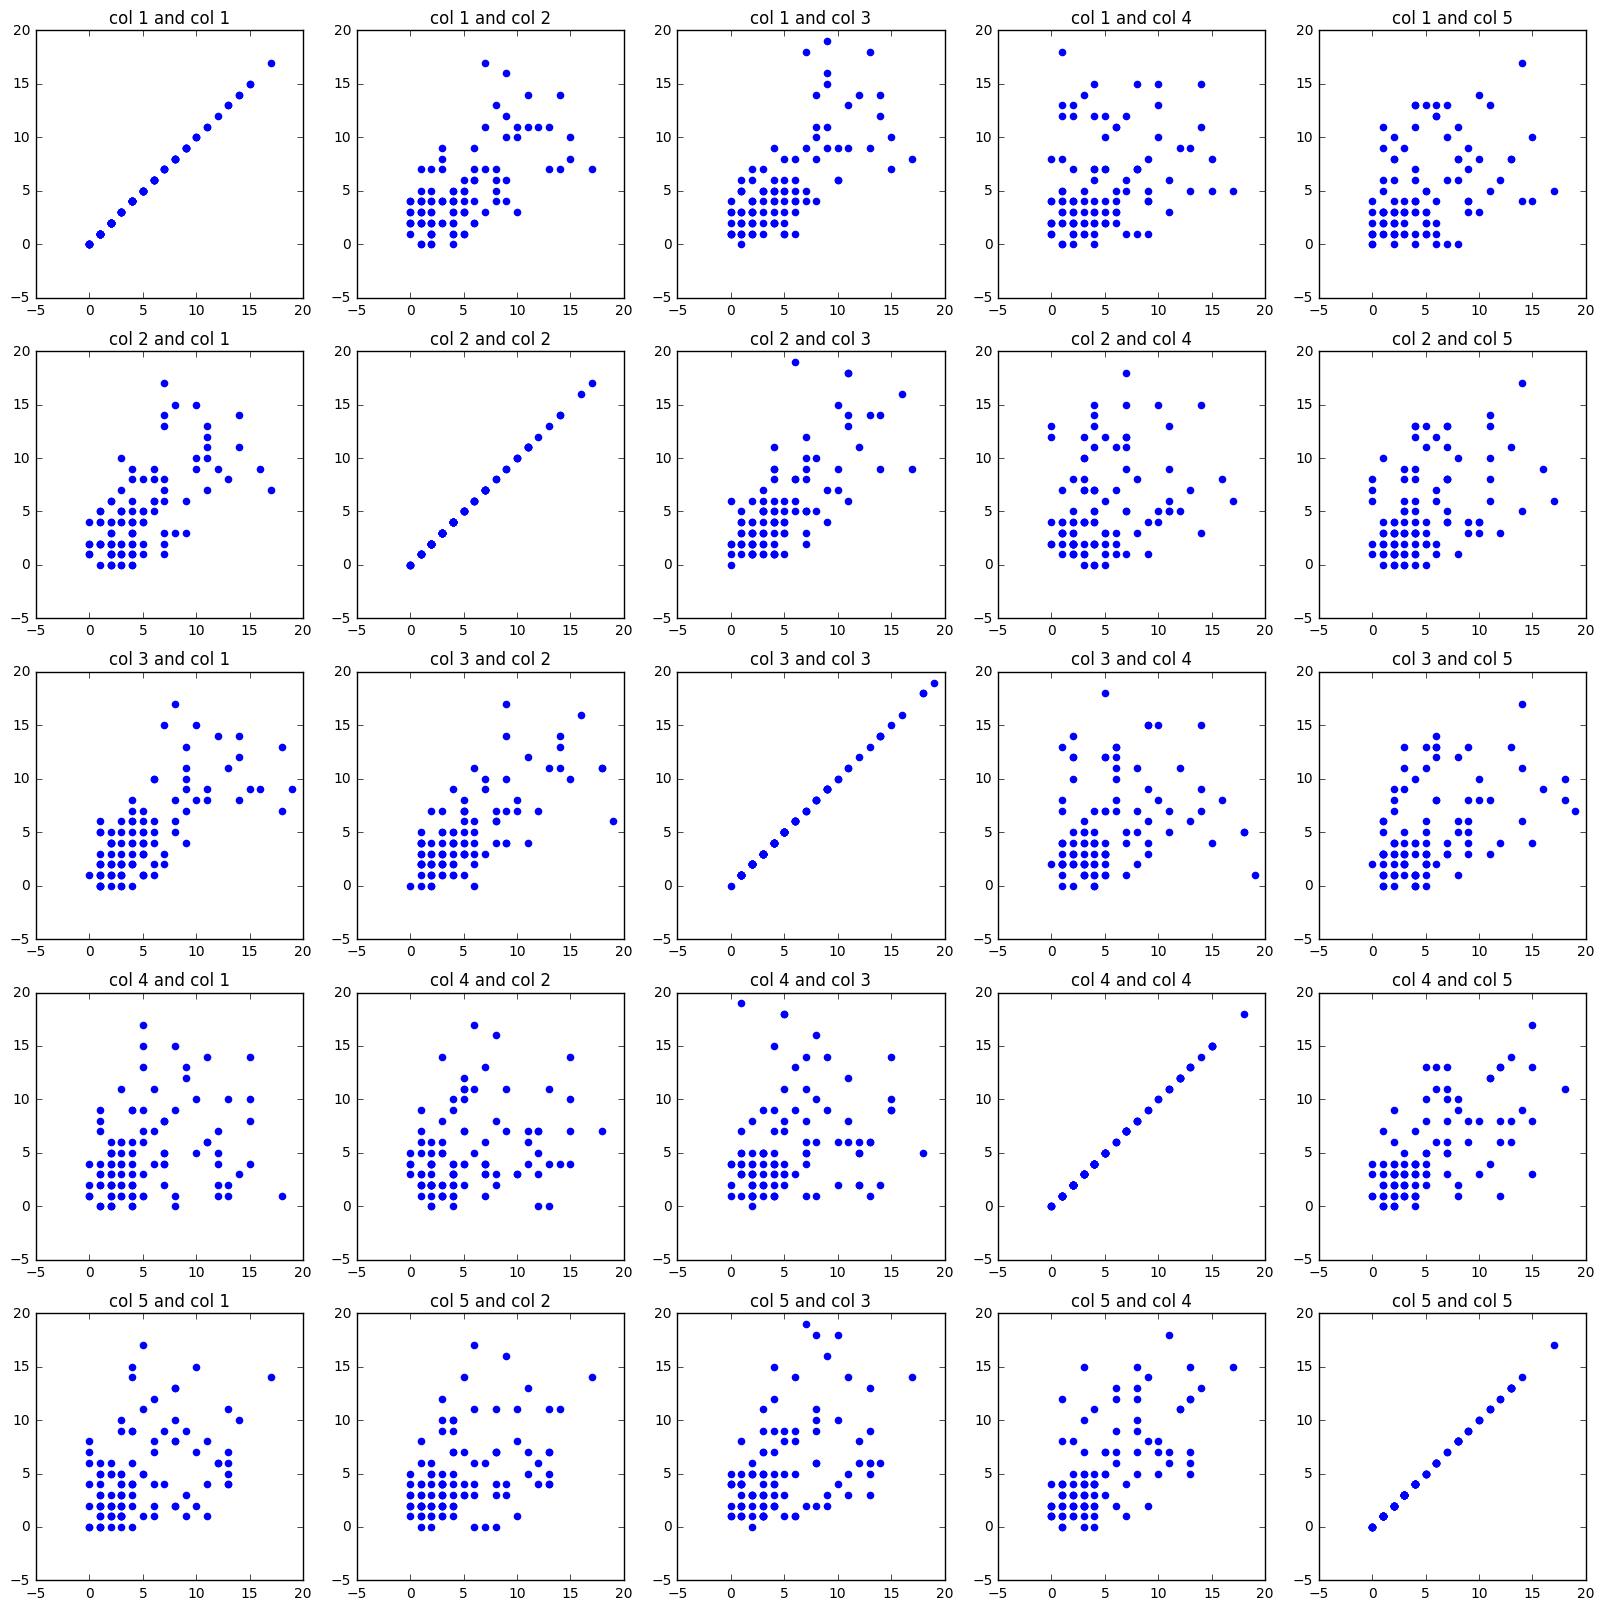

In [2]:
#1.1 c)
fig = plt.figure(figsize=(20,20))
n = 0
for i in range(5):
    for j in range(5):
        n=n+1
        plt.subplot(5,5,n)
        plt.scatter(data[:,i], data[:,j],color="blue")
        plt.title("col %i" % (i+1)+ " and col %i" %(j+1))

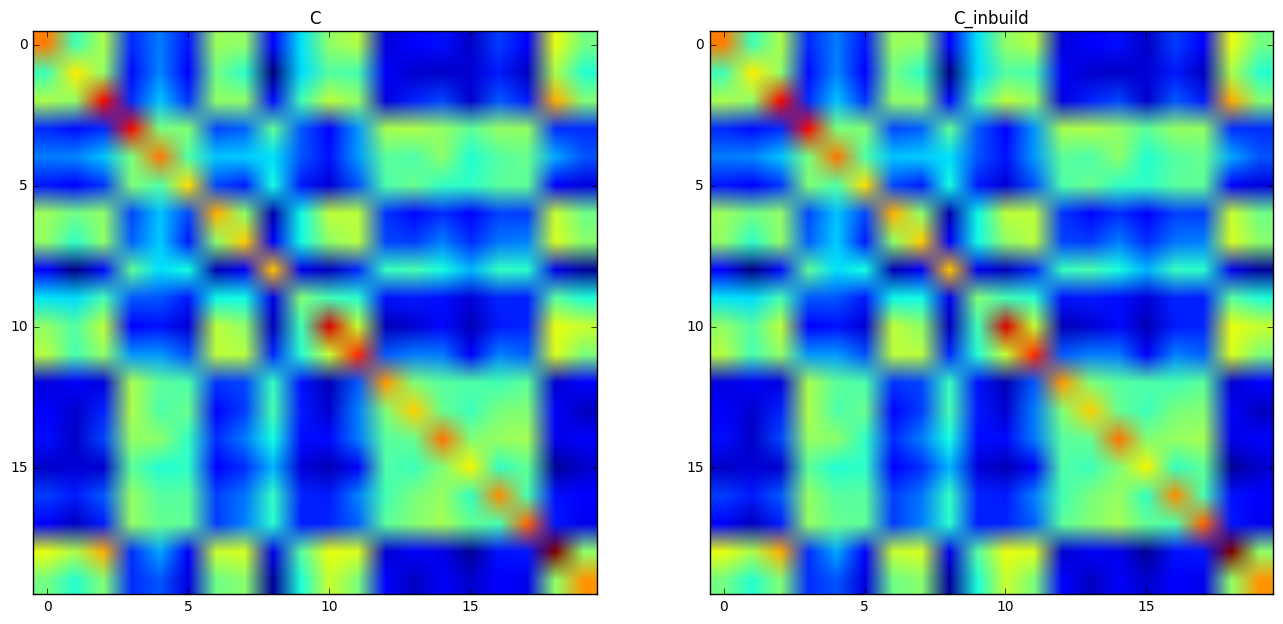

In [4]:
X = data
N = len(X)
X = X - np.mean(X,axis=0)
C = np.dot(X.T,X)/N
C_inbuild = np.cov(data.T)

#heat map 
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.title("C")
plt.imshow(C)
plt.subplot(2,2,2)
plt.title("C_inbuild")
plt.imshow(C_inbuild)

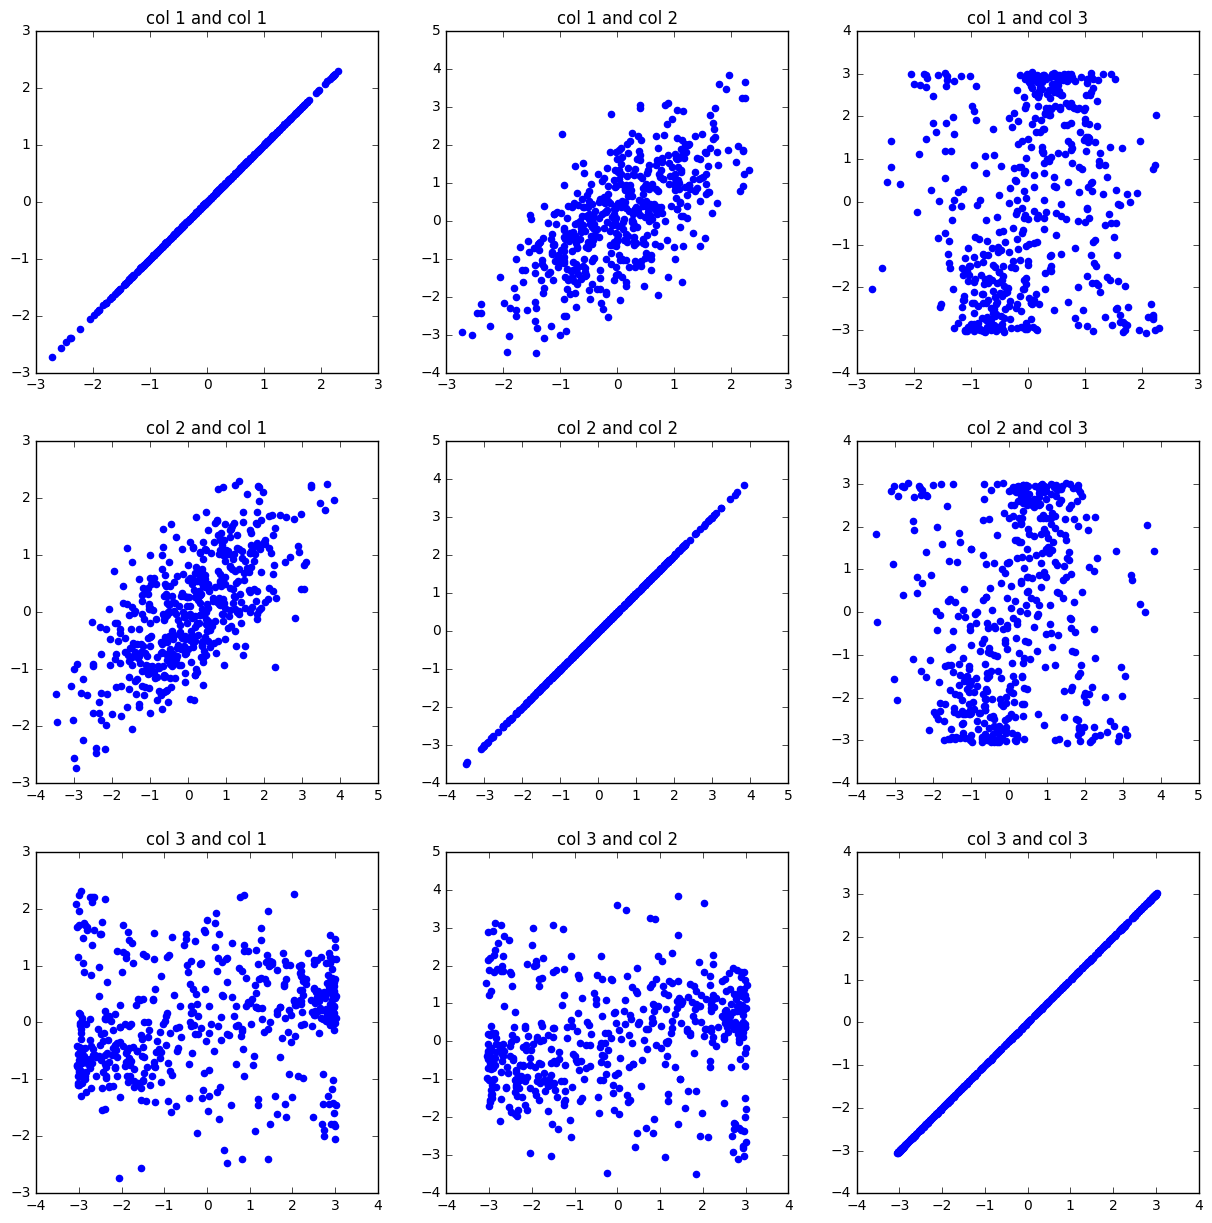

In [5]:
#1.2 a)
usecol= np.arange(1,21)
data2 = np.loadtxt('pca-data-3d.txt', skiprows=1, delimiter=',')

#1.2 b)
m = len(data2[0])
fig = plt.figure(figsize=(m*5,m*5))
n = 0
for i in range(m):
    for j in range(m):
        n=n+1
        plt.subplot(3,3,n)
        plt.scatter(data2[:,i], data2[:,j],color="blue")
        plt.title("col %i" % (i+1)+ " and col %i" %(j+1))

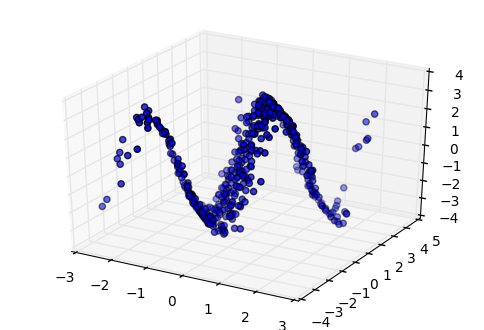

In [6]:
#1.2 c)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2[:,0], data2[:,1], data2[:,2])

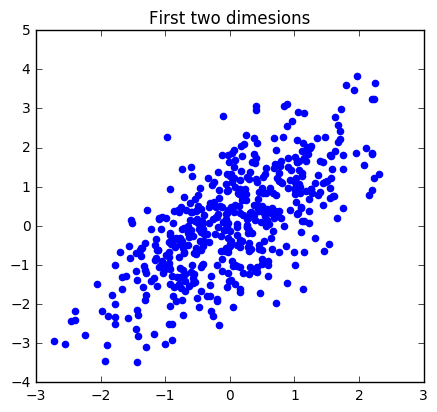

In [7]:
#1.2 d)
plt.figure(figsize=(5,10)) 
plt.subplot(2,1,1)
plt.scatter(data2[:,0], data2[:,1],color="blue")
plt.title("First two dimesions")


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


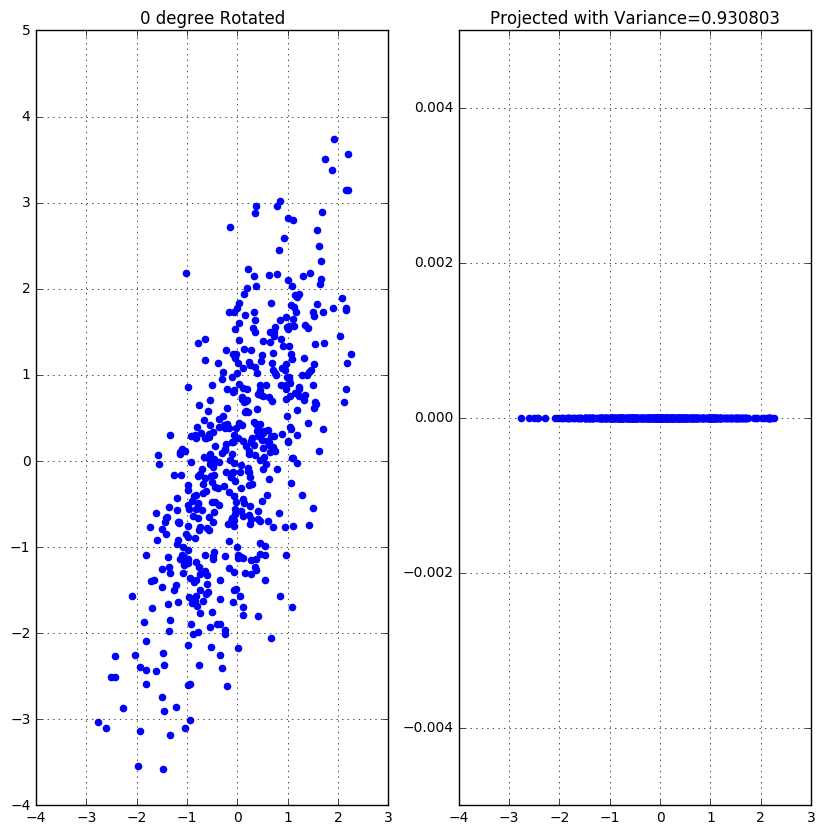

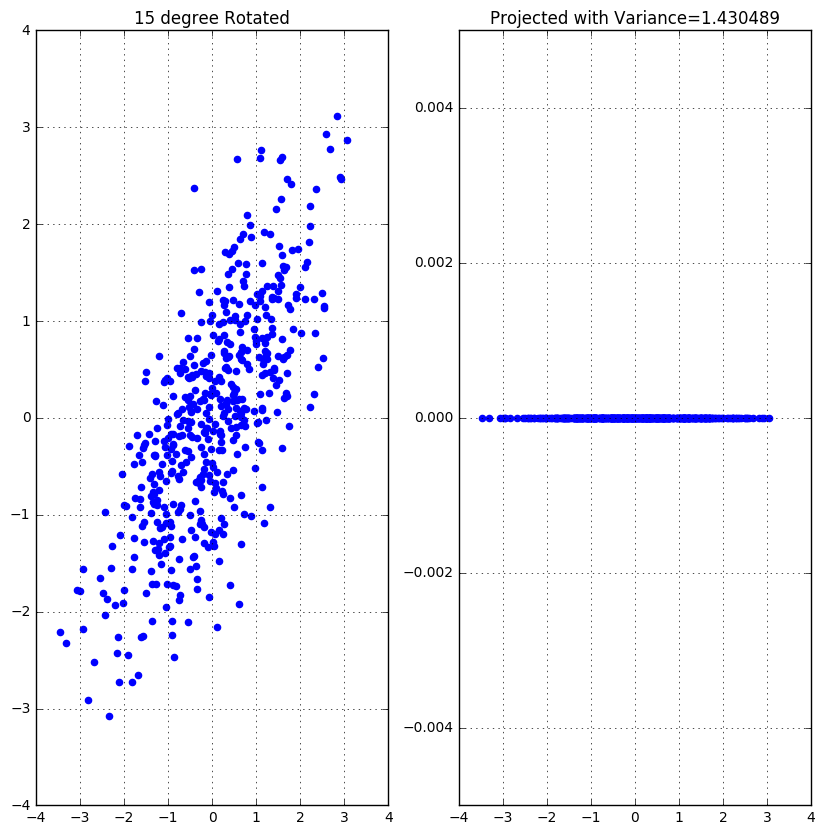

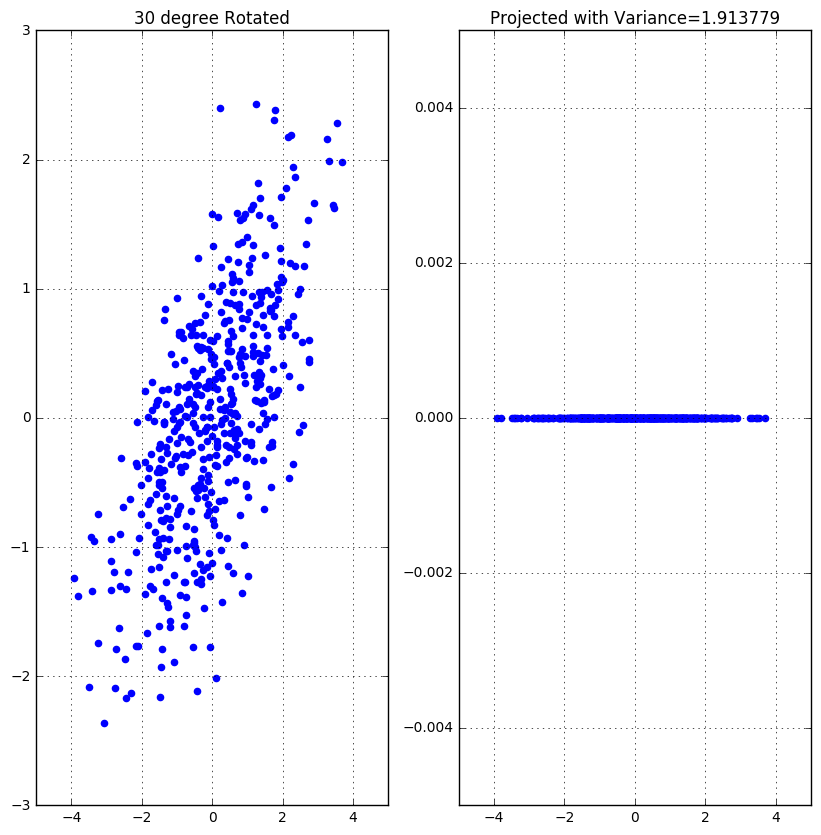

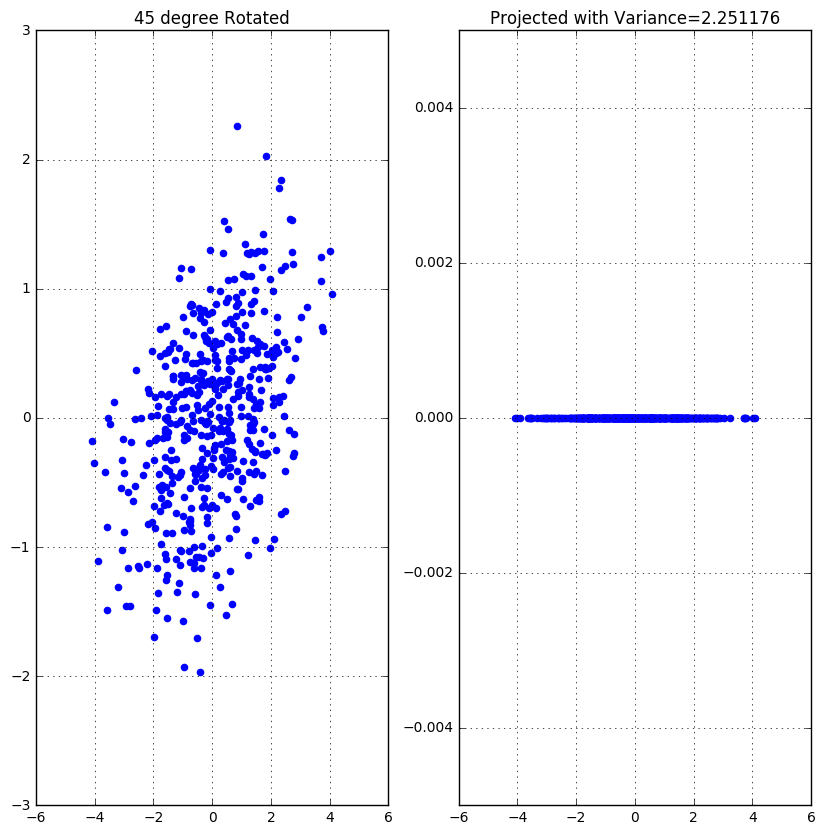

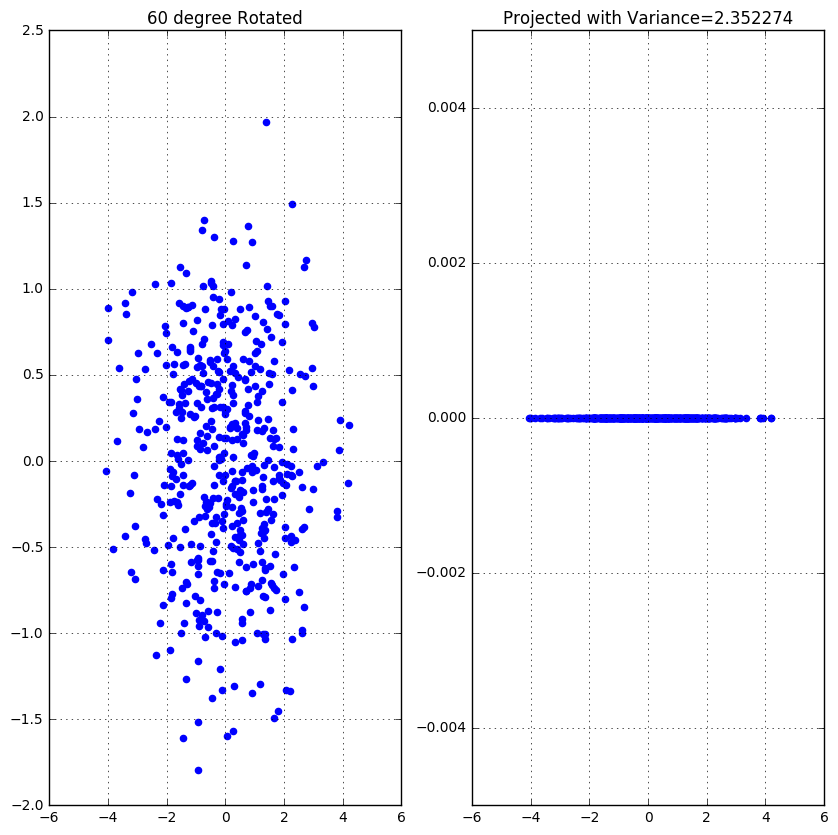

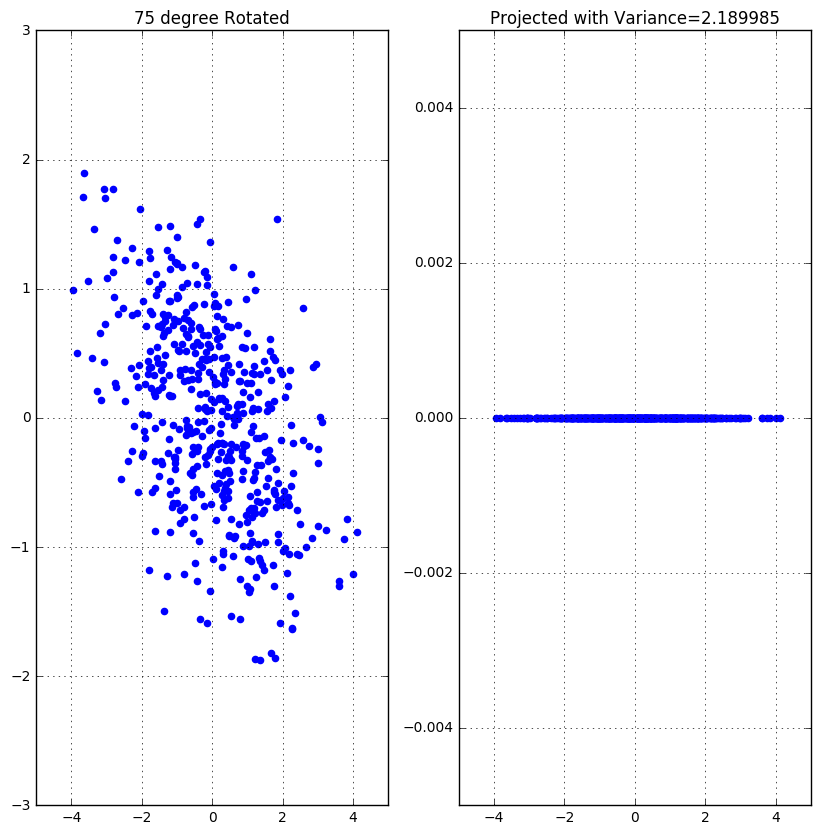

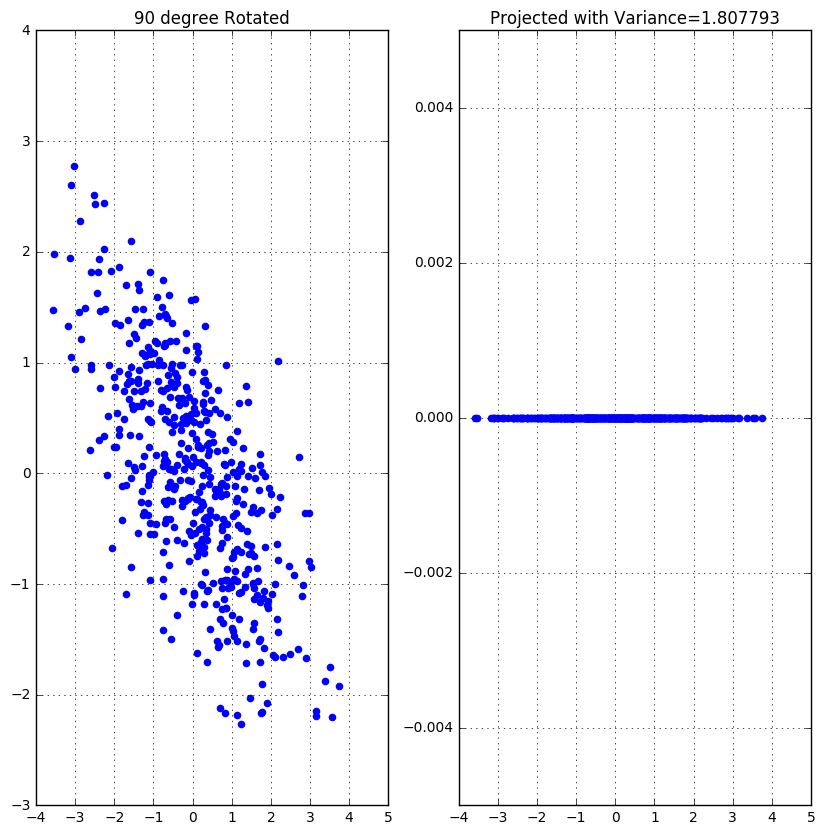

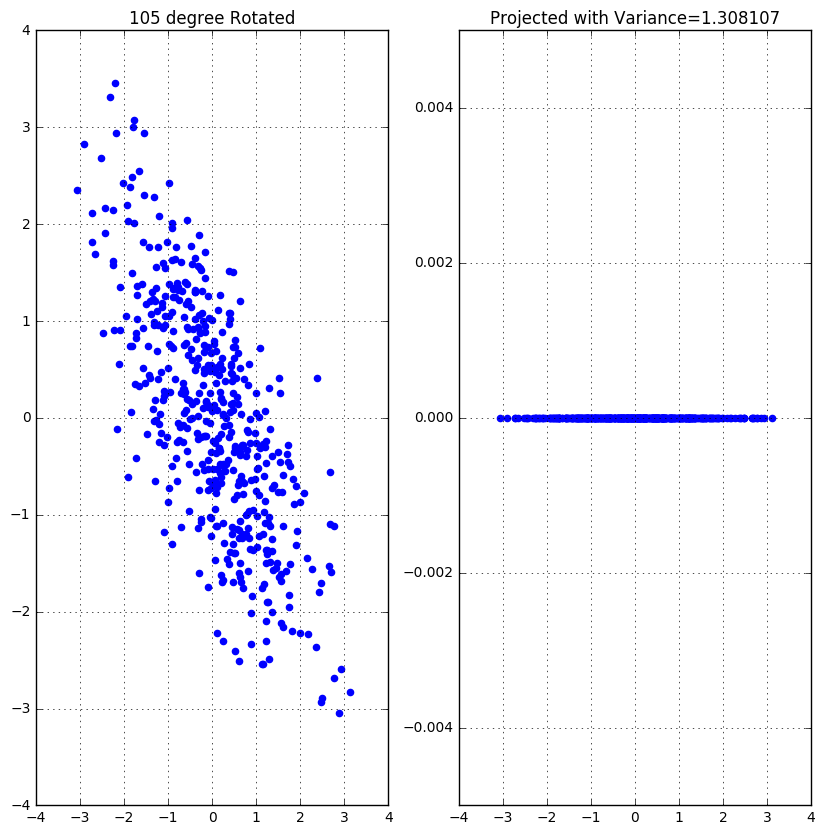

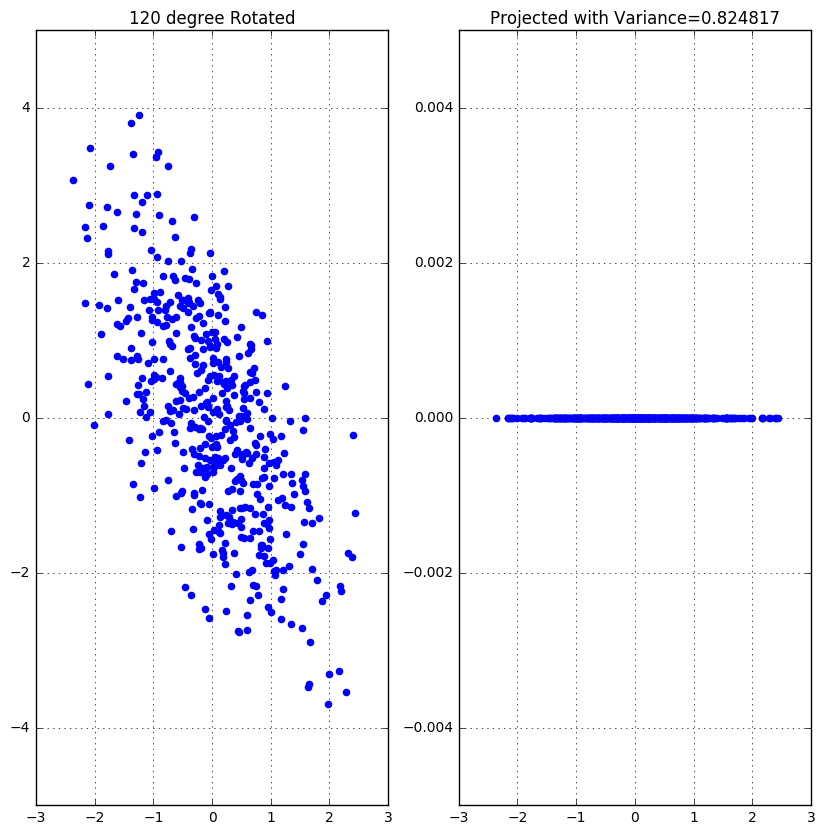

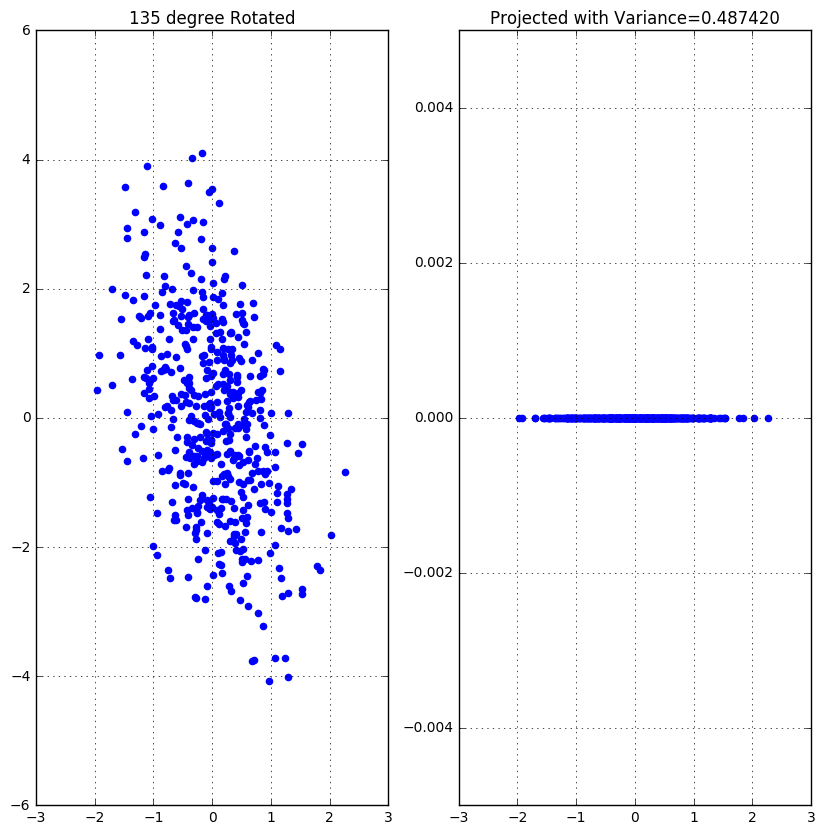

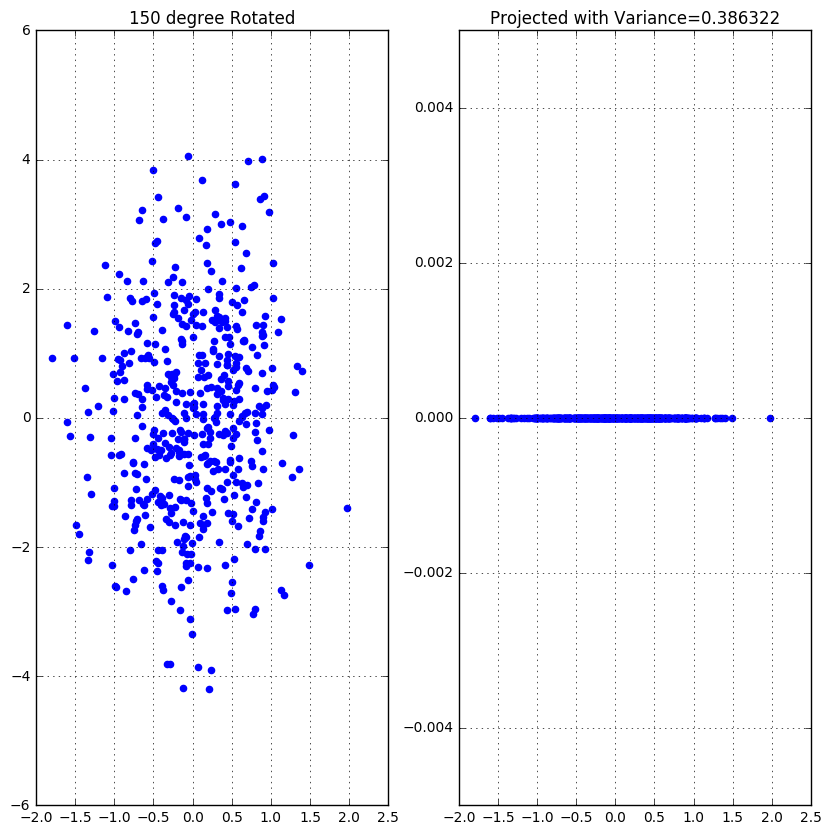

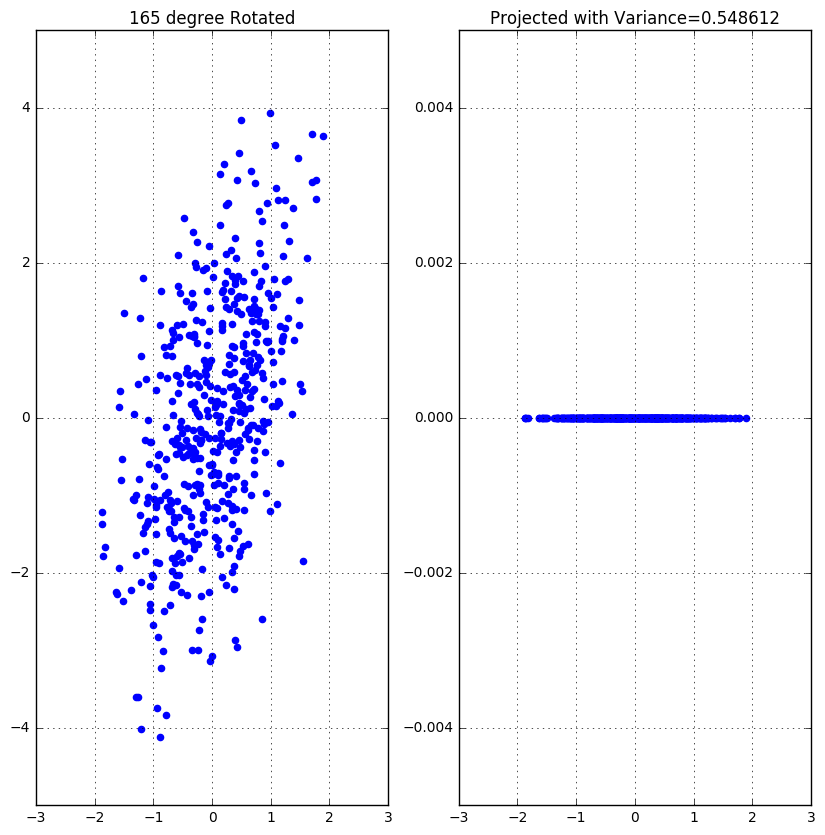

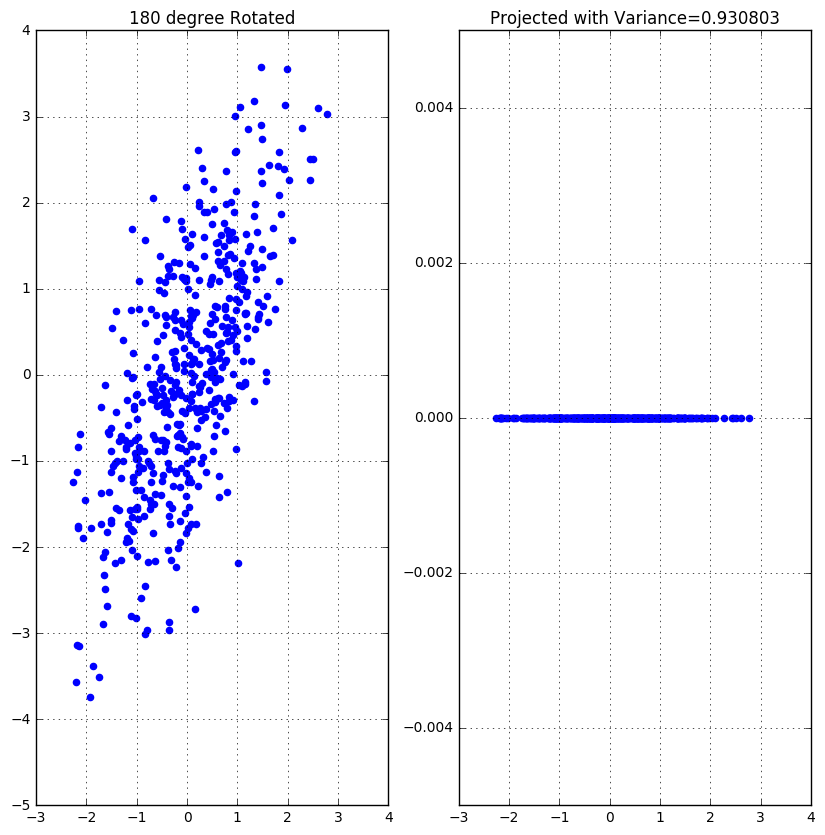

In [15]:
N = len(data2)
meanx = np.mean(data2[:,:2], axis=0)
zero = np.zeros(N)
data2m = data2[:,:2] - meanx

def rotate(Mat,theta):
    R = np.empty((2,2))

    R[0][0]= np.cos(theta)
    R[0][1]= -np.sin(theta)
    R[1][0]= np.sin(theta)
    R[1][1]= np.cos(theta)
    Mat = np.dot(R,Mat.T)
    
    return Mat.T



anglevar=np.empty((2,13))
for i in range(13):
    t = np.radians(-i*15)
    anglevar[0][i]=i*15
    datarot = rotate(data2m,t)
    #var = np.sum((datarot[:,0]-np.mean(datarot[:,0]))**2)
    var = np.var(datarot[:,0])
    anglevar[1][i]=var
    
    
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,10))
    axL.scatter(datarot[:,0], datarot[:,1],color="blue")
    axL.set_title("%i degree Rotated"%(i*15))
    axL.grid(True)
    axR.scatter(datarot[:,0], zero,color="blue")
    axR.set_title("Projected with Variance=%f"%var)
    axR.grid(True)
    fig.show()

    

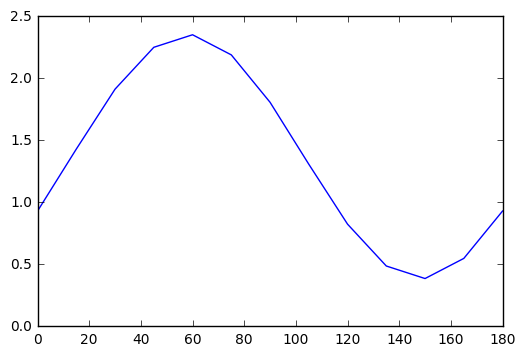

In [11]:
plt.plot(anglevar[0],anglevar[1])


In [1]:
#1.3 a)
import matplotlib.cm as cm
from PIL import Image
import matplotlib.image as mpimg
img=mpimg.imread('natIMG.jpg')
print(img.shape)
#1.3 b)
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'natIMG.jpg'

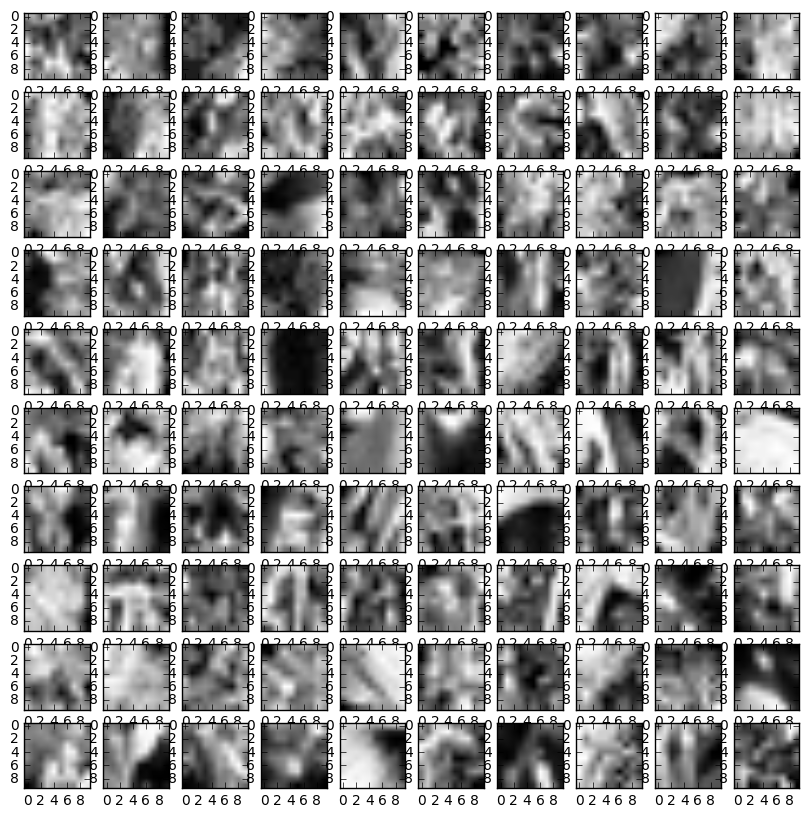

In [14]:
#1.3 c)
imgrow = len(img)
imgcol = len(img[0])
patch = np.empty((100,10,10))
samplerow =np.random.choice((imgrow-10), 100)
samplecol =np.random.choice((imgcol-10), 100)

fig = plt.figure(figsize=(10,10))
for i in range(100):
    tmp = img[samplerow[i]:samplerow[i]+10,samplecol[i]:samplecol[i]+10]
    patch[i]=tmp
    plt.subplot(10,10,i+1)
    plt.imshow(patch[i],cmap = cm.Greys_r)